# Reading Images and Video using OpenCV

In [2]:
import cv2 as cv

In [2]:
img = cv.imread('D:/JupyterNotebooks/8525.jpg')

In [6]:
cv.imshow('S Letter',img)#first parameter is Name of the window" and second parameter is image size or (15,15)-->size
cv.waitKey(2000)#0 means it will wait for infinite time, or 6000 means  6sec time it will wait
# Wait for 2000 milliseconds (2 seconds)
# Close the window
cv.destroyAllWindows()

103

In [5]:
#Reading a video
capture = cv.VideoCapture('D:/JupyterNotebooks/Teaser.mp4')
#capture = cv.VideoCapture(0) 0 means web camera reading, 1 means another cam, 2 means another cam,,., how many camera you connected
while True:
    isTrue, frame = capture.read()
    cv.imshow('Video',frame)
    ##stop the video playing indefinately
    if cv.waitKey(20) & 0xFF ==ord('d'):# pressing "d" key from keyboard destroys windows
        break
capture.release()
cv.destroyAllWindows()#destroys all windows

In [3]:
capture = cv.VideoCapture(1)

In [8]:
def rescale_value(frame,scale=0.25):
    width = int(frame.shape[1]*scale)
    height = int(frame.shape[0]*scale)
    dimensions = (width,height)
    return cv.resize(frame, dimensions,interpolation=cv.INTER_AREA)

In [9]:
capture = cv.VideoCapture('D:/JupyterNotebooks/Teaser.mp4')
while True:
    isTrue, frame = capture.read()
    frame_resized = rescale_value(frame)
    cv.imshow('Video',frame_resized)
    if cv.waitKey(20) &0xFF ==ord('d'):
        break

capture.release()
cv.destroyAllWindows()#destroys all windows

In [15]:
resized_image = rescale_value(img)
cv.imshow('Image',resized_image)
cv.waitKey(20)

-1

# Draw Shapes and Texts in an Image

In [6]:
def resized_frame(frame,scale=0.2):
    width=int(frame.shape[1]*scale)
    height=int(frame.shape[0]*scale)
    dimension = (width, height)
    return cv.resize(frame,dimension,interpolation=cv.INTER_AREA)

In [11]:
image=cv.imread('D:/JupyterNotebooks/8525.jpg')
resized_image=resized_frame(image)
cv.imshow('Resized Image',resized_image)
cv.waitKey(0)#when a key is pressed then the window will be destroyed
cv.destroyAllWindows()

In [13]:
import numpy as np

In [15]:
# creating a blank image
blank_image = np.zeros((500,500,3),dtype='uint8')#'unit8 is the datatype of an image'
cv.imshow('Blank Image',blank_image)
cv.waitKey(0)#when a key is pressed then the window will be destroyed
cv.destroyAllWindows()

In [17]:
#1 Point the image a certain color
blank_image[200:300,300:400]=0,255,0#green color
cv.imshow('Resized-Green Image',blank_image)
cv.waitKey(0)#when a key is pressed then the window will be destroyed
cv.destroyAllWindows()

In [21]:
#Draw a rectangle on an image
cv.rectangle(blank_image,(0,0),(250,250),(0,255,0),thickness=2)#(0,0)-->origin,(250,250) another corner, (0,255,0)-->color green
cv.imshow('Rectangle',blank_image)
cv.waitKey(2000)
cv.destroyAllWindows()
#if thickness = cv.FILLED or thickness=-1 colore filled in rectangle

In [27]:
# Draw a circle
cv.circle(blank_image,(blank_image.shape[1]//2,blank_image.shape[0]//2),radius = 40,color = (0,255,0),thickness=2)
cv.imshow('Circle',blank_image)
cv.waitKey(0)
cv.destroyAllWindows()

In [35]:
#Draw a straight line
# Draw a circle
cv.line(blank_image,pt1=(400,200),pt2=(blank_image.shape[1]//2,blank_image.shape[0]//2),color = (0,0,255),thickness=2)
cv.imshow('Line',blank_image)
cv.waitKey(0)
cv.destroyAllWindows()

In [38]:
#Writing a text on image
cv.putText(blank_image,'Hello',(400,350),fontFace=cv.FONT_HERSHEY_DUPLEX,fontScale=1.0,color=(255,255,255),thickness=2)
cv.imshow('Line',blank_image)
cv.waitKey(0)
cv.destroyAllWindows()

# Basic Functions in OpenCV

In [40]:
img = cv.imread('D:/JupyterNotebooks/8525.jpg')#127x127
cv.imshow("S Letter",img)
cv.waitKey(5000)
cv.destroyAllWindows()

In [42]:
#Converting an image to gray scale
gray_img=cv.cvtColor(img,cv.COLOR_BGR2GRAY)
cv.imshow("Gray Image",gray_img)
cv.waitKey(2000)
cv.destroyAllWindows()

In [46]:
#Making bulr
blur_image=cv.GaussianBlur(src=img,ksize=(5,5),sigmaX=cv.BORDER_DEFAULT)#ksize increses blur image
cv.imshow("Blur Image",blur_image)
cv.waitKey(2000)
cv.destroyAllWindows()

In [47]:
#Edge Cascade Detection
canny_image = cv.Canny(img,threshold1=125,threshold2=175)
cv.imshow("Edge Detection",canny_image)
cv.waitKey(2000)
cv.destroyAllWindows()

In [54]:
#Dialate image using specific straucture, 
dilated_image=cv.dilate(canny_image,(7,7),iterations=1)
cv.imshow("Dilated Detection",dialated_image)
cv.waitKey(5000)
cv.destroyAllWindows()

In [56]:
#Eroded image(reverse of dilated)
eroded_image=cv.erode(dilated_image,(7,7),iterations=3)
cv.imshow("Erode Image",eroded_image)
cv.waitKey(5000)
cv.destroyAllWindows()

In [58]:
#Resize and crop an image
resize_image = cv.resize(img,(500,500),interpolation=cv.INTER_CUBIC)
#if shrinking the image use cv.resize(img,(50,50),interpolation=cv.INTER_LINEAR OR INTER_CUBIC)
cv.imshow("Resized Image",resize_image)
cv.waitKey(5000)
cv.destroyAllWindows()

In [60]:
#Crop image
cropped_image=img[50:200,40:50]
cv.imshow("Cropped Image",cropped_image)
cv.waitKey(5000)
cv.destroyAllWindows()

# Image Transformations

In [62]:
import numpy as np
img = cv.imread('D:/JupyterNotebooks/8525.jpg')#127x127
cv.imshow("S Letter",img)
cv.waitKey(5000)
cv.destroyAllWindows()

In [65]:
# Translation ..>x,y are interchanged
def translate(img,x,y):
    transmat=np.float32([[1,0,x],[0,1,y]])
    dimensions = (img.shape[1],img.shape[0])
    return cv.warpAffine(img,transmat,dimensions)

## -x-->left
## -y-->up
## x-->Right
## y-->Down

translated = translate(img,100,100)#shifting image down by 100, right by 100 pixels from border
cv.imshow("Traslated image",translated)
cv.waitKey(5000)
cv.destroyAllWindows()

In [69]:
#Rotation
def rotate_image(img,angle,rotPoint=None):
    (height,width)=img.shape[:2]

    if rotPoint is None:
        rotPoint = (width//2,height//2)
    rotMat = cv.getRotationMatrix2D(rotPoint,angle,1.0)
    dimensions = (width,height)
    return cv.warpAffine(img,rotMat,dimensions)
        

rotated = rotate_image(img,45)
cv.imshow("Rotated image",rotated)
cv.waitKey(5000)
cv.destroyAllWindows()

In [74]:
#Flipping
flipping=cv.flip(img,0)
#0-->means flip by x-axis
#1-->means flip by y-axis
#-1-->means flip by both x and y axis
cv.imshow("Flip image",flipping)
cv.waitKey(5000)
cv.destroyAllWindows()

# Contour Detection

In [77]:
#Contour->Boundaries of Image
#convert image to Gray and then canny image
contours,hirarchies = cv.findContours(canny_image,cv.RETR_LIST,cv.CHAIN_APPROX_NONE)
print("Contours found",len(contours))

Contours found 77


In [79]:
ret, threshold = cv.threshold(gray_img,125,225,cv.THRESH_BINARY)
cv.imshow("Threshold image",threshold)
cv.waitKey(5000)
cv.destroyAllWindows()
contours,hirarchies = cv.findContours(threshold,cv.RETR_LIST,cv.CHAIN_APPROX_NONE)
print("Contours found",len(contours))

Contours found 77


In [81]:
cv.drawContours(blank_image,contours,-1,(0,0,255),1)
cv.imshow("Contours drawn",blank_image)
cv.waitKey(5000)
cv.destroyAllWindows()

# Color Spaces & Color Channels

In [82]:
photo = cv.VideoCapture(0)
cv.imshow("Web cam",photo)
cv.waitKey(5000)
cv.destroyAllWindows()

error: OpenCV(4.10.0) :-1: error: (-5:Bad argument) in function 'imread'
> Overload resolution failed:
>  - Expected 'filename' to be a str or path-like object
>  - Expected 'filename' to be a str or path-like object
>  - Expected 'filename' to be a str or path-like object


In [86]:
#Capture a photo
# Access the camera
cap = cv.VideoCapture(0)

# Read a frame from the camera
ret, frame = cap.read()

# Save the frame as an image
cv.imwrite("photo.jpg", frame)

# Release the camera
cap.release()
cv.imshow("Captured image",frame)
cv.waitKey(5000)
cv.destroyAllWindows()

In [3]:
import cv2 as cv
#Capture a video
# define a video capture object 
vid = cv.VideoCapture(0) 
  
while(True): 
      
    # Capture the video frame 
    # by frame 
    ret, frame = vid.read() 
  
    # Display the resulting frame 
    cv.imshow('frame', frame) 
      
    # the 'q' button is set as the 
    # quitting button you may use any 
    # desired button of your choice 
    if cv.waitKey(1) & 0xFF == ord('q'): 
        break
  
# After the loop release the cap object 
vid.release() 
# Destroy all the windows 
cv.destroyAllWindows() 

In [1]:
import cv2 as cv

In [2]:
img = cv.imread("D:/JupyterNotebooks/8525.jpg")
cv.imshow("Original Image",img)
cv.waitKey(0)
cv.destroyWindow("Original Image")
#BGR to GrayScale
gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
cv.imshow("GrayScale Img",gray)
cv.waitKey(0)
cv.destroyAllWindows()

In [3]:
# BGR TO HueSaturationValue(HSV)
hsv = cv.cvtColor(img,cv.COLOR_BGR2HSV)
cv.imshow("HSV Img",hsv)
cv.waitKey(0)
cv.destroyAllWindows()

In [4]:
#BGR to L+a+b
lab = cv.cvtColor(img,cv.COLOR_BGR2LAB)
cv.imshow("LAB Img",lab)
cv.waitKey(0)
cv.destroyAllWindows()

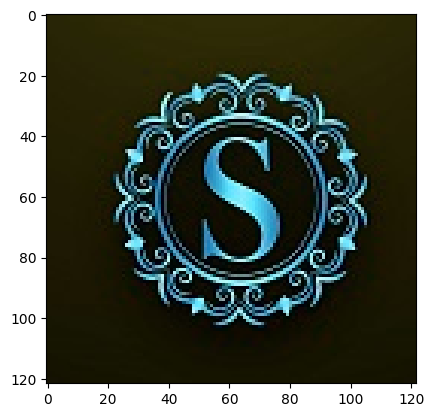

In [5]:
import matplotlib.pyplot as plt
plt.imshow(img)
plt.show()

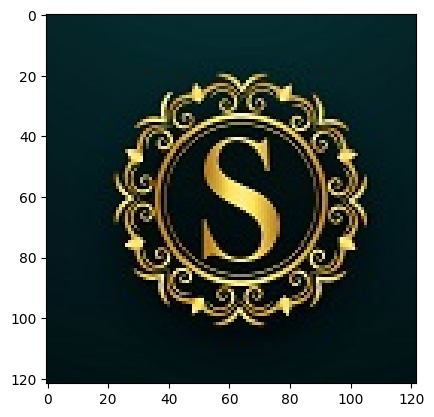

In [7]:
#BGR to RGB
rgb = cv.cvtColor(img,cv.COLOR_BGR2RGB)
cv.imshow("RGB Img",rgb)
plt.imshow(rgb)
plt.show()
cv.waitKey(0)
cv.destroyAllWindows()

In [8]:
#hsv to bgr
hsv_bgr = cv.cvtColor(hsv,cv.COLOR_HSV2BGR)
cv.imshow("BGR Img",hsv_bgr)
cv.waitKey(0)
cv.destroyAllWindows()

In [10]:
gray_bgr = cv.cvtColor(gray,cv.COLOR_GRAY2BGR)
cv.imshow("BGR Img",gray_bgr)
cv.waitKey(0)
cv.destroyAllWindows()

In [11]:
b,g,r = cv.split(img)
cv.imshow("Blue",b)
cv.imshow("Green",g)
cv.imshow("Red",r)
cv.waitKey(0)
cv.destroyAllWindows()

In [12]:
#merged
merged = cv.merge([b,g,r])
cv.imshow("Merged",merged)
cv.waitKey(0)
cv.destroyAllWindows()

# Blurring

In [14]:
#Aberaging
average = cv.blur(img,(3,3))
cv.imshow("average",average)
cv.waitKey(0)
cv.destroyAllWindows()

In [16]:
#Gaussin Blur
g_blur = cv.GaussianBlur(img,(3,3),0)
cv.imshow("G-blur",g_blur)
cv.waitKey(0)
cv.destroyAllWindows()

In [17]:
#median blur
m_blur = cv.medianBlur(img,3)
cv.imshow("Median-blur",m_blur)
cv.waitKey(0)
cv.destroyAllWindows()

In [19]:
#Bilater Blur
b_blur = cv.bilateralFilter(img,5,15,15)
cv.imshow("Bilateral-blur",b_blur)
cv.waitKey(0)
cv.destroyAllWindows()

# BITWISE operations
AND OR NOT XOR

In [2]:
img = cv.imread("D:/JupyterNotebooks/8525.jpg")
cv.imshow("Original Image",img)
cv.waitKey(0)
cv.destroyWindow("Original Image")

In [1]:
import numpy as np

In [5]:
blank = np.zeros((400,400),dtype='uint8')

rectangle = cv.rectangle(blank.copy(),(30,30),(370,370),255,-1)
circle = cv.circle(blank.copy(),(200,200),200,255,-1)
cv.imshow('Rectangle',rectangle)
cv.imshow('Circle',circle)
cv.waitKey(0)
cv.destroyAllWindows()

In [6]:
#bitwise AND --intersecting regions
bitwise_AND = cv.bitwise_and(rectangle,circle)
cv.imshow("Bitwise AND",bitwise_AND)
cv.waitKey(0)
cv.destroyAllWindows()

In [7]:
#bitwise OR-->non intersecting and intersecting regions
bitwise_OR = cv.bitwise_or(rectangle,circle)
cv.imshow("Bitwise OR",bitwise_OR)
cv.waitKey(0)
cv.destroyAllWindows()

In [8]:
#bitwise XOR non insecting regions
bitwise_XOR = cv.bitwise_xor(rectangle,circle)
cv.imshow("Bitwise XOR",bitwise_XOR)
cv.waitKey(0)
cv.destroyAllWindows()

In [9]:
#bitwise NOT inverse
bitwise_NOT = cv.bitwise_not(rectangle)
cv.imshow("Bitwise NOT",bitwise_NOT)
cv.waitKey(0)
cv.destroyAllWindows()

# MASKING

In [4]:
img = cv.imread("D:/JupyterNotebooks/8525.jpg")
cv.imshow("Original Image",img)
cv.waitKey(0)
cv.destroyWindow("Original Image")

In [11]:
blank = np.zeros((400,400),dtype='uint8')

rectangle = cv.rectangle(blank.copy(),(30,30),(370,370),255,-1)
circle = cv.circle(blank.copy(),(200,200),200,255,-1)
cv.imshow('Rectangle',rectangle)
cv.imshow('Circle',circle)
cv.waitKey(0)
cv.destroyAllWindows()

In [12]:
blank = np.zeros((400,400),dtype='uint8')
# cv.imshow('Blank Image',blank)
mask = cv.circle(blank.copy(),(100,100),100,255,-1)
cv.imshow('Mask',mask)
cv.waitKey(0)
cv.destroyAllWindows()

In [14]:
resized = cv.resize(img,(400,400),interpolation=cv.INTER_CUBIC)
masked = cv.bitwise_and(resized,resized,mask=mask)
cv.imshow('Masked',masked)
cv.waitKey(0)
cv.destroyAllWindows()

# Histograms

In [15]:
import matplotlib.pyplot as plt

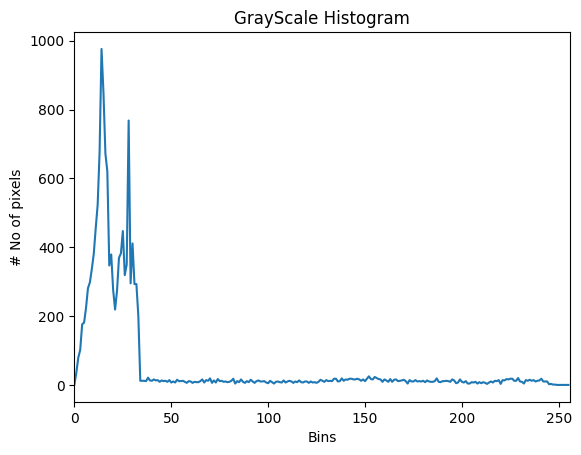

In [17]:
#GrayScale image
gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
gray_hist = cv.calcHist([gray],[0],None,[256],[0,256])
plt.figure()
plt.title("GrayScale Histogram")
plt.xlabel("Bins")
plt.ylabel('# No of pixels')
plt.plot(gray_hist)
plt.xlim([0,256])
plt.show()

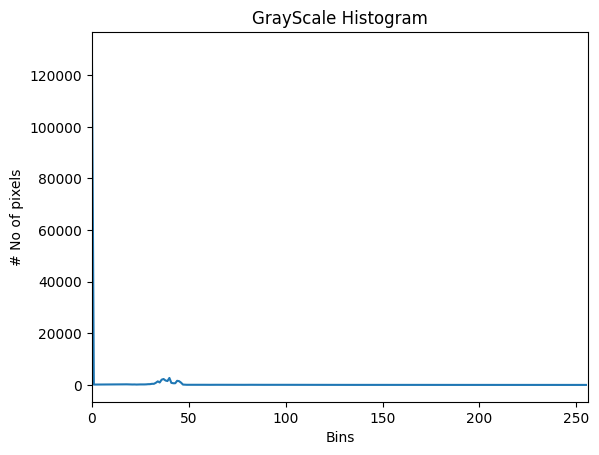

In [20]:
#Compute histogram for a masked area
masked_hist=cv.calcHist([masked],[0],None,[256],[0,256])
plt.figure()
plt.title("GrayScale Histogram")
plt.xlabel("Bins")
plt.ylabel('# No of pixels')
plt.plot(masked_hist)
plt.xlim([0,256])
plt.show()

In [21]:
#Color histogram

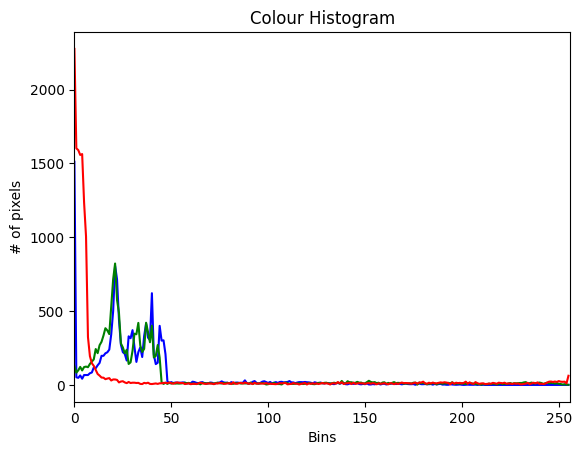

In [22]:
colors = ('b','g','r')
plt.figure()
plt.title('Colour Histogram')
plt.xlabel('Bins')
plt.ylabel('# of pixels')
for i, col in enumerate(colors):
    hist = cv.calcHist([img],[i],None,[256],[0,256])
    plt.plot(hist,color=col)
    plt.xlim([0,256])

plt.show()

    

# Thresholding/Binarizing Images

In [27]:
# Simple Threshold
threshold,thresh = cv.threshold(gray,225,255,cv.THRESH_BINARY)
cv.imshow('Thresholded',thresh)
cv.waitKey(0)
cv.destroyAllWindows()

In [28]:
threshold,thresh_inv = cv.threshold(gray,225,255,cv.THRESH_BINARY_INV)
cv.imshow('Thresholded Inverse',thresh_inv)
cv.waitKey(0)
cv.destroyAllWindows()

In [32]:
# Adaptive Threshold
adptive_thresh = cv.adaptiveThreshold(gray,225,cv.ADAPTIVE_THRESH_MEAN_C,cv.THRESH_BINARY,11,3)
cv.imshow('Adaptive Threshold',adptive_thresh)
cv.waitKey(0)
cv.destroyAllWindows()

# Edge Detection & Gradients

In [34]:
 #Laplacian
lap = cv.Laplacian(gray,cv.CV_64F)
lap = np.uint8(np.absolute(lap))
cv.imshow('Lapacian',lap)
cv.waitKey(0)
cv.destroyAllWindows()

In [38]:
# Sobel 
sobelx = cv.Sobel(gray, cv.CV_64F, 1, 0)
sobely = cv.Sobel(gray, cv.CV_64F, 0, 1)
combined_sobel = cv.bitwise_or(sobelx, sobely)
cv.imshow('Sobel X', sobelx)
cv.imshow('Sobel Y', sobely)
cv.imshow('Sobel',combined_sobel)
cv.waitKey(0)
cv.destroyAllWindows()

In [36]:
canny = cv.Canny(gray, 150, 175)
cv.imshow('Canny', canny)
cv.waitKey(0)
cv.destroyAllWindows()

# FACE DETECTION with Haar Cascades

In [39]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

In [40]:
img = cv.imread('D:/JupyterNotebooks/sharath01.jpg')
#cv.imshow("Orignal Image",img)

gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
cv.imshow("Gray",gray)
cv.waitKey(0)
cv.destroyAllWindows()

In [41]:
# 
haar_cascade = cv.CascadeClassifier("D:/JupyterNotebooks/haar_cascade.xml")
faces_rect = haar_cascade.detectMultiScale(gray,scaleFactor=1.1,minNeighbors=3)
#we get faces index above
print('Number of faces found: ',len(faces_rect))

Number of faces found:  1


In [42]:
for (x,y,w,h) in faces_rect:
    cv.rectangle(img,(x,y),(x+w,y+h),(0,255,0),thickness=2)

cv.imshow('Detected faces ',img)
cv.waitKey(0)
cv.destroyAllWindows()

# Face Recognition with OpenCV's built-in recognizer

In [1]:
import os
import numpy as np
import cv2 as cv

In [2]:
peoples=[]
for i in os.listdir("D:/JupyterNotebooks/Faces/train"):
    peoples.append(i)
peoples

['Ben Afflek', 'Elton John', 'Jerry Seinfield', 'Madonna', 'Mindy Kaling']

In [3]:
DIR="D:/JupyterNotebooks/Faces/train"

In [4]:
features=[]
labels=[]

haar_cascade = cv.CascadeClassifier("D:/JupyterNotebooks/haar_cascade.xml")


def create_train():
    for person in peoples:
        path=os.path.join(DIR,person)
        label=peoples.index(person)

        for img in os.listdir(path):
            img_path=os.path.join(path,img)
            img_array = cv.imread(img_path)
            gray = cv.cvtColor(img_array,cv.COLOR_BGR2GRAY)

            faces_rect = haar_cascade.detectMultiScale(gray,scaleFactor=1.1,minNeighbors=4)

            for (x,y,w,h) in faces_rect:
                faces_roi = gray[y:y+h,x:x+w]
                features.append(faces_roi)
                labels.append(label)

create_train()

In [5]:
features = np.array(features, dtype='object')
labels = np.array(labels)

face_recognizer = cv.face.LBPHFaceRecognizer_create()

# Train the Recognizer on the features list and the labels list
face_recognizer.train(features,labels)

face_recognizer.save('D:/JupyterNotebooks/face_trained.yml')
np.save('features.npy', features)
np.save('labels.npy', labels)

In [6]:
face_recognizer.read('./face_trained.yml')
img = cv.imread('D:/JupyterNotebooks/Faces/val/elton_john/1.jpg')
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
cv.imshow('Person', gray)

# Detect the face in the image
faces_rect = haar_cascade.detectMultiScale(gray, 1.1, 4)

for (x,y,w,h) in faces_rect:
    faces_roi = gray[y:y+h,x:x+w]

    label, confidence = face_recognizer.predict(faces_roi)
    print(f'Label = {peoples[label]} with a confidence of {confidence}')

    cv.putText(img, str(peoples[label]), (20,20), cv.FONT_HERSHEY_COMPLEX, 1.0, (0,255,0), thickness=2)
    cv.rectangle(img, (x,y), (x+w,y+h), (0,255,0), thickness=2)

cv.imshow('Detected Face', img)

cv.waitKey(0)
cv.destroyAllWindows()

Label = Elton John with a confidence of 67.00856809674691


# Deep Computer Vision: The Simpsons